In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats

In [67]:
#Q1
df = pd.read_csv('green_tripdata_2015-09.csv')
print ("ROWS:", df.shape[0])
print ("COLUMNS:", df.shape[1])
df.info()

ROWS: 1494926
COLUMNS: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1

In [68]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


Text(0.5, 1.0, 'Histogram of Trip Distance with outliers included')

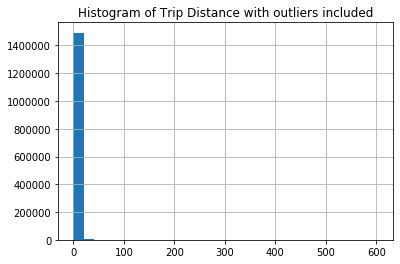

In [69]:
#Q2
df.Trip_distance.hist(bins = 30)
plt.title('Histogram of Trip Distance with outliers included')

In [70]:
median = np.median(df.Trip_distance)
mean = np.mean(df.Trip_distance)
std = np.std(df.Trip_distance)
median, mean, std

(1.98, 2.9681408511189864, 3.076619780340042)

Text(0.5, 1.0, 'Histogram of Trip Distance without outliers')

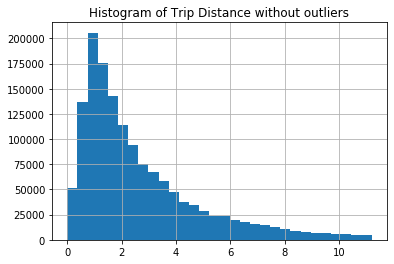

In [71]:
df.Trip_distance[~((df.Trip_distance-median)>3*std)].hist(bins=30)
plt.title('Histogram of Trip Distance without outliers')

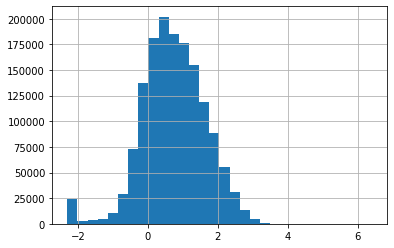

In [72]:
df['Trip_logdistance'] = df['Trip_distance'].apply(lambda x: np.log(x + 0.1))
df.Trip_logdistance.hist(bins = 30)

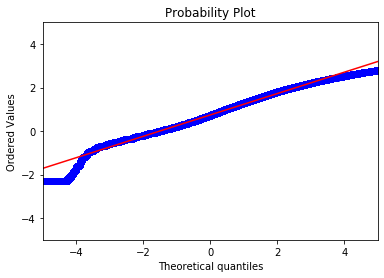

In [73]:
stats.probplot(df.Trip_logdistance, dist=stats.logistic, plot=plt)
plt.axis([-5,5,-5,5])
plt.show()

In [74]:
#Q3
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], infer_datetime_format=True)
df['Lpep_dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'], infer_datetime_format=True)
df['Pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['Dropoff_hour'] = df['Lpep_dropoff_datetime'].dt.hour
df_hourly_distance=df[['Trip_distance','Pickup_hour']].groupby(by='Pickup_hour').mean()
df_hourly_distance.columns=['mean_Trip_distance']
df_hourly_distance['medium_Trip_distance']=df[['Trip_distance','Pickup_hour']].groupby(by='Pickup_hour').median()
df_hourly_distance

,mean_Trip_distance,medium_Trip_distance
Pickup_hour,,
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98


In [75]:
'''
conda install -c conda-forge/label/cf201901 folium
import folium
world_map = folium.Map()
'''

'\nconda install -c conda-forge/label/cf201901 folium\nimport folium\nworld_map = folium.Map()\n'

In [76]:
#RateCodeID = 2 or 3
airports_trips = df[(df.RateCodeID==2) | (df.RateCodeID==3)]
print("Number of trips to/from NYC airports: ", airports_trips.shape[0])
print("Average fare (per meter) of trips to/from NYC airports: $", airports_trips.Fare_amount.mean(),"per trip")
print("Average total charged amount (without tip) of trips to/from NYC airports: $", airports_trips.Total_amount.mean(),"per trip")
print("Average total tip amount of trips to/from NYC airports: $", airports_trips.Tip_amount.mean(),"per trip")

Number of trips to/from NYC airports:  5552
Average fare (per meter) of trips to/from NYC airports: $ 48.976945244956774 per trip
Average total charged amount (without tip) of trips to/from NYC airports: $ 57.20842038904719 per trip
Average total tip amount of trips to/from NYC airports: $ 4.353515850144067 per trip


In [77]:
#Q4
df['tip_%'] = df['Tip_amount']/df['Total_amount']
df = df[df['tip_%']<1]
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
Trip_logdistance                float64
Pickup_hour                       int64
Dropoff_hour                      int64
tip_%                           float64


In [78]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,Trip_logdistance,Pickup_hour,Dropoff_hour,tip_%
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,NaN,0.0,9.75,1,2.0,-2.302585,0,0,0.200000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,NaN,0.0,45.00,1,2.0,-2.302585,0,0,0.000000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.0,NaN,0.3,5.80,1,1.0,-0.371064,0,0,0.086207
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.0,NaN,0.3,6.30,2,1.0,-0.174353,0,0,0.000000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.0,NaN,0.3,6.30,2,1.0,-0.342490,0,0,0.000000


In [79]:
#continuous variable

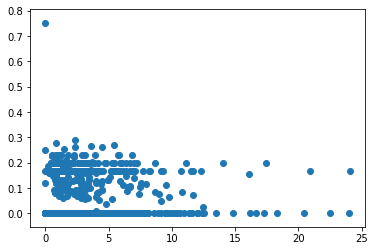

In [80]:
plt.scatter(x='Trip_distance', y="tip_%", data=df.sample(1000))

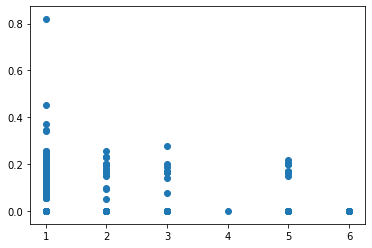

In [81]:
plt.scatter(x='Passenger_count', y="tip_%", data=df.sample(1000))

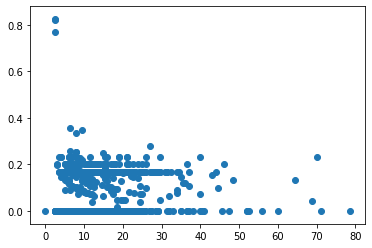

In [82]:
plt.scatter(x='Fare_amount', y="tip_%", data=df.sample(1000))

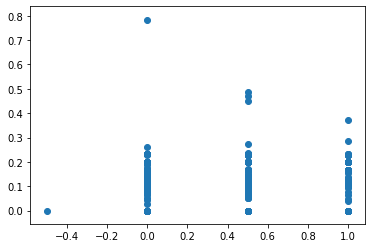

In [83]:
plt.scatter(x='Extra', y="tip_%", data=df.sample(1000))

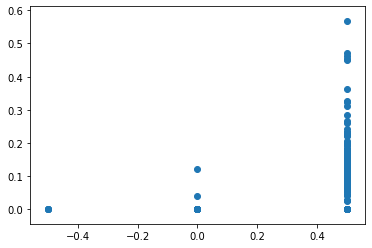

In [84]:
plt.scatter(x='MTA_tax', y="tip_%", data=df.sample(1000))

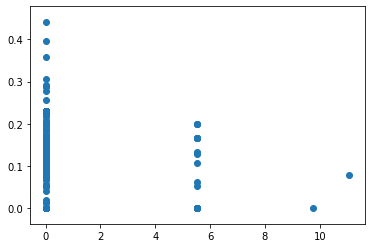

In [85]:
plt.scatter(x='Tolls_amount', y="tip_%", data=df.sample(1000))

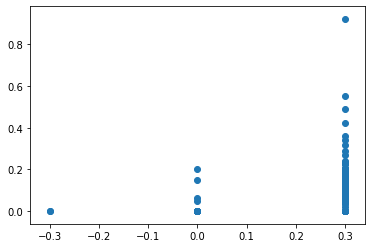

In [86]:
plt.scatter(x='improvement_surcharge', y="tip_%", data=df.sample(1000))

In [87]:
#catrgorical variable

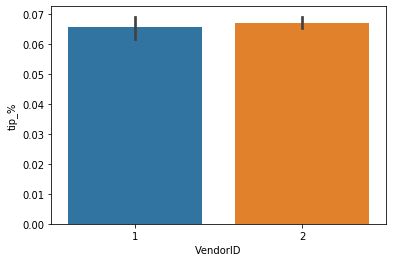

In [88]:
sns.barplot(x='VendorID', y="tip_%", data=df.sample(10000))

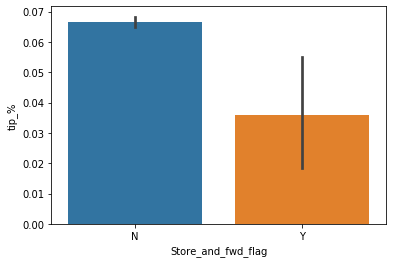

In [89]:
sns.barplot(x='Store_and_fwd_flag', y="tip_%", data=df.sample(10000))

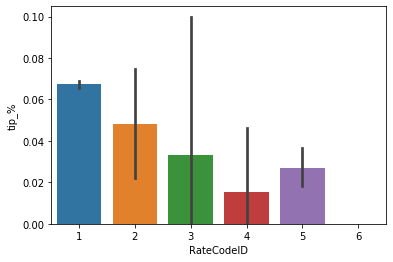

In [90]:
sns.barplot(x='RateCodeID', y="tip_%", data=df.sample(10000))

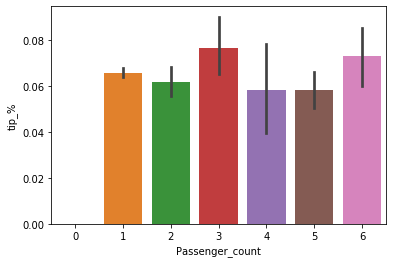

In [91]:
sns.barplot(x='Passenger_count', y="tip_%", data=df.sample(10000))

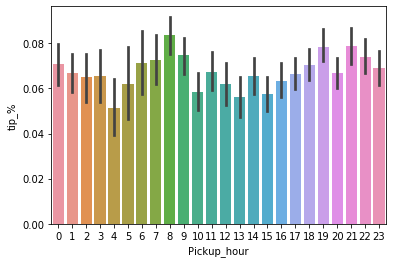

In [92]:
sns.barplot(x='Pickup_hour', y="tip_%", data=df.sample(10000))

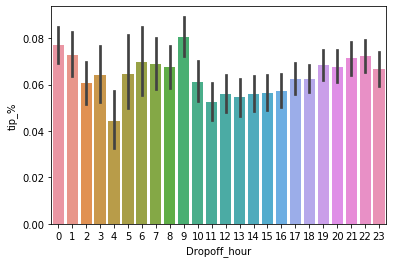

In [93]:
sns.barplot(x='Dropoff_hour', y="tip_%", data=df.sample(10000))

In [94]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.formula.api import ols

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn_pandas import DataFrameMapper

In [120]:
df['Store_and_fwd_flag'] = df.loc[df['Store_and_fwd_flag'] == 'N'] = 1
df['Store_and_fwd_flag'] = df.loc[df['Store_and_fwd_flag'] == 'Y'] = 2
mapper = DataFrameMapper([(['VendorID','Store_and_fwd_flag','Passenger_count','Trip_distance','Fare_amount','Extra',
                            'MTA_tax','Tolls_amount','improvement_surcharge','Payment_type','Pickup_hour','Dropoff_hour'],[StandardScaler()])])
X = mapper.fit_transform(df)
y = df['tip_%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
predictions = model.predict(sm.add_constant(X_test))

# Print out the statistics
print('Baseline model with the mean tip percentage: RMSE=',np.sqrt(mse(y_test.mean(),y_test)))
print('Full model: RMSE=',np.sqrt(mse(predictions, y_test)))
print('Full model: R-square=',explained_variance_score(y_test, predictions))
model.summary()

/Users/cnq0316/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Baseline model with the mean tip percentage: RMSE= 0.08814298234704657
Full model: RMSE= 0.05553540936005066
Full model: R-square= 0.603032172455038


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tip_%   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.456e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:01:40   Log-Likelihood:             1.5372e+06
No. Observations:             1043420   AIC:                        -3.074e+06
Df Residuals:                 1043408   BIC:                        -3.074e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665   5.43e-05   1225.268      0.000       0.066       0.067
x1            -0.0028   5.46e-05    -51.836      0.000      -0.003      -0.003
x2          8.239e-18   1.05e-19     78.505      0.000    8.03e-18    8.45e-18
x3             0.0004   5.46e-05      7.116      0.000       0.000       0.000
x4             0.0031      0.000     30.441      0.000       0.003       0.003
x5            -0.0057      0.000    -56.172      0.000      -0.006      -0.005
x6            -0.0003   5.69e-05     -5.094      0.000      -0.000      -0.000
x7           3.89e-05      0.000      0.186      0.852      -0.000       0.000
x8             0.0007   5.78e-05     12.234      0.000       0.001       0.001
x9            -0.0001      0.000     -0.511      0.609      -0.001       0.000
x10           -0.0690   5.53e-05  -1249.518      0.000      -0.069      -0.069
x11          -5.8e-05      0.000     -0.379      0.705      -0.000       0.000
x12            0.0007      0.000      4.427      0.000       0.000       0.001
==============================================================================
Omnibus:                   499015.716   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25510259.484
Skew:                           1.553   Prob(JB):                         0.00
Kurtosis:                      27.023   Cond. No.                     6.91e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.8e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [121]:
df.corrwith(df['tip_%'])

VendorID                -0.006864
Store_and_fwd_flag            NaN
RateCodeID              -0.064766
Pickup_longitude        -0.002603
Pickup_latitude         -0.004812
Dropoff_longitude       -0.018093
Dropoff_latitude         0.009614
Passenger_count          0.001342
Trip_distance            0.096665
Fare_amount              0.086946
Extra                    0.015090
MTA_tax                  0.071580
Tip_amount               0.719130
Tolls_amount             0.043161
Ehail_fee                     NaN
improvement_surcharge    0.070916
Total_amount             0.231298
Payment_type            -0.776017
Trip_type               -0.066472
Trip_logdistance         0.117126
Pickup_hour              0.011497
Dropoff_hour             0.010211
tip_%                    1.000000
dtype: float64

In [130]:
'''
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = "+".join(df.columns - ["tip_%"])
y, X = dmatrices('tip_% ~' + features, df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
'''

'\nfrom patsy import dmatrices\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nfeatures = "+".join(df.columns - ["tip_%"])\ny, X = dmatrices(\'tip_% ~\' + features, df, return_type=\'dataframe\')\nvif = pd.DataFrame()\nvif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nvif["features"] = X.columns\n'

In [132]:
mapper = DataFrameMapper([(['VendorID','Store_and_fwd_flag','Passenger_count','Trip_distance','Fare_amount','Extra',
                            'MTA_tax','Tolls_amount','improvement_surcharge','Pickup_hour','Dropoff_hour'],[StandardScaler()])])
X = mapper.fit_transform(df)
y = df['tip_%']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
predictions = model.predict(sm.add_constant(X_test))

# Print out the statistics
print('Baseline model with the mean tip percentage: RMSE=',np.sqrt(mse(y_test.mean(),y_test)))
print('Full model: RMSE=',np.sqrt(mse(predictions, y_test)))
print('Full model: R-square=',explained_variance_score(y_test, predictions))
model.summary()

Baseline model with the mean tip percentage: RMSE= 0.08814298234704657
Full model: RMSE= 0.08744971859248009
Full model: R-square= 0.01567777680487048


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tip_%   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:23:52   Log-Likelihood:             1.0599e+06
No. Observations:             1043420   AIC:                        -2.120e+06
Df Residuals:                 1043409   BIC:                        -2.120e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665   8.58e-05    775.538      0.000       0.066       0.067
x1            -0.0006   8.61e-05     -6.502      0.000      -0.001      -0.000
x2          1.487e-17   1.74e-18      8.531      0.000    1.15e-17    1.83e-17
x3          8.256e-05   8.62e-05      0.957      0.338   -8.64e-05       0.000
x4             0.0053      0.000     33.377      0.000       0.005       0.006
x5             0.0033      0.000     21.033      0.000       0.003       0.004
x6             0.0004   8.99e-05      4.522      0.000       0.000       0.001
x7             0.0065      0.000     19.568      0.000       0.006       0.007
x8             0.0014   9.14e-05     15.663      0.000       0.001       0.002
x9             0.0001      0.000      0.308      0.758      -0.001       0.001
x10            0.0009      0.000      3.669      0.000       0.000       0.001
x11            0.0001      0.000      0.574      0.566      -0.000       0.001
==============================================================================
Omnibus:                   271669.075   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1050211.704
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                       7.220   Cond. No.                     1.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [126]:
'''
mapper_poly= DataFrameMapper([
    (['Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tolls_amount','improvement_surcharge'],[PolynomialFeatures(2),StandardScaler()])

X2 = mapper_poly.fit_transform(df)
y2 = df['tip_%'].reset_index(drop=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=43)

model2 = sm.OLS(y_train2, X_train2).fit()
predictions2 = model2.predict(X_test2) 

print('Baseline model with the mean tip percentage: RMSE=',np.sqrt(mse(y_test2.mean(), y_test2)))
print('Full model: RMSE=',np.sqrt(mse(predictions2, y_test2)))
print('Full model: R-square=',explained_variance_score(y_test2, predictions2))
'''

"\nmapper_poly= DataFrameMapper([\n    (['Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tolls_amount','improvement_surcharge'],[PolynomialFeatures(2),StandardScaler()])\n\nX2 = mapper_poly.fit_transform(df)\ny2 = df['tip_%'].reset_index(drop=True)\n\nX_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=43)\n\nmodel2 = sm.OLS(y_train2, X_train2).fit()\npredictions2 = model2.predict(X_test2) \n\nprint('Baseline model with the mean tip percentage: RMSE=',np.sqrt(mse(y_test2.mean(), y_test2)))\nprint('Full model: RMSE=',np.sqrt(mse(predictions2, y_test2)))\nprint('Full model: R-square=',explained_variance_score(y_test2, predictions2))\n"

In [157]:
#Q5a
'''
median_speed = df['trip_speed'].loc[(df['Trip_distance']>0) & (df['trip_time']>0)].median()

# index type of data error
dist_0 = (df['Trip_distance']==0) & (df['trip_time']>0)
time_0 = (df['Trip_distance']>0) & (df['trip_time']==0)
ratecode_2 = (df['Trip_distance']==0) & (df['trip_time']==0) & (df['RateCodeID']==2)
other_err = (df['Trip_distance']==0) & (df['trip_time']==0) & (df['RateCodeID']!=2)


# For trips with distance = 0 and time >0, replaced by median speed * trip time                                  
df['Trip_distance'].loc[dist_0] = df['trip_time'].loc[dist_0]*median_speed

# For trips with distance > 0 and time = 0, replaced by trip distance /median speed 
df['trip_time'].loc[time_0] = df['Trip_distance'].loc[time_0]/median_speed

# For trips with distance ==0 and time = 0 and rate code ==2, replaced by median distance and time for rate code ==2
df['trip_time'].loc[ratecode_2] = df['trip_time'].loc[(df['Trip_distance']>0) & (df['trip_time']>0) \
                                                      & (df['RateCodeID']==2)].median()
df['Trip_distance'].loc[ratecode_2] = df['Trip_distance'].loc[(df['Trip_distance']>0) & (df['trip_time']>0) \
                                                      & (df['RateCodeID']==2)].median()

# For trips with distance ==0 and time = 0 and rate code !=2, replaced using median distance or time/dollar*fare
time_p_usd = df['trip_time']/df['Fare_amount']
distance_p_usd = df['Trip_distance']/df['Fare_amount']

df['trip_time'].loc[other_err] = df['Fare_amount'].loc[other_err] * time_p_usd.median()
df['Trip_distance'].loc[other_err] = df['Fare_amount'].loc[other_err] * distance_p_usd.median()

# recalculate speed after impution
df['trip_speed'] = df['Trip_distance']/df['trip_time']
'''

In [158]:
from datetime import datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], infer_datetime_format=True)
df['Lpep_dropoff_datetime'] = pd.to_datetime(df['Lpep_dropoff_datetime'], infer_datetime_format=True)
tdelta = df['Lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_time'] = tdelta.astype('timedelta64[m]')
df['trip_speed'] = df['Trip_distance'] / df['trip_time']
df['trip_speed_mph'] = df['trip_speed']*60
print('Average Speed:',round(df['trip_speed_mph'].mean(),1))
print('Standard Deviation:',round(df['trip_speed_mph'].std(),1))
print('Median Speed:',round(df['trip_speed_mph'].median(),1))
print('The 95% of speed fell between', round(df['trip_speed_mph'].quantile(.025),1),'to',round(df['trip_speed_mph'].quantile(.975), 1))

Average Speed: nan
Standard Deviation: nan
Median Speed: 12.7
The 95% of speed fell between 5.4 to 36.0


In [160]:
'''
df['week'] = df['lpep_pickup_datetime'].dt.week.astype(str)
mod = ols('trip_speed_mph ~ week',data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table
'''

"\ndf['week'] = df['lpep_pickup_datetime'].dt.week.astype(str)\nmod = ols('trip_speed_mph ~ week',data=df).fit()\naov_table = sm.stats.anova_lm(mod, typ=2)\naov_table\n"